In [21]:
import numpy as np

import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt

In [42]:

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

np.random.seed(42)
y_values = [2*i + 1 for i in x_values] + np.random.randn(len(range(11)))
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [36]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [44]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [45]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [55]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(0.6434, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 0, loss 0.6433903574943542
tensor(0.6415, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 1, loss 0.6415063142776489
tensor(0.6396, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 2, loss 0.6396427154541016
tensor(0.6378, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 3, loss 0.6378000378608704
tensor(0.6360, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 4, loss 0.635978102684021
tensor(0.6342, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 5, loss 0.6341765522956848
tensor(0.6324, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 6, loss 0.6323947906494141
tensor(0.6306, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 7, loss 0.6306333541870117
tensor(0.6289, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 8, loss 0.628891110420227
tensor(0.6272, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 9, loss 0.6271686553955078
tensor(0.6255, device='cuda:0', grad_fn=<MeanBackward0>)
epoch 10, loss 0.6254653334617615
tensor(0.62

In [56]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'Name: {name}\nParam: {param.data}')

Name: linear.weight
Param: tensor([[2.0165]], device='cuda:0')
Name: linear.bias
Param: tensor([1.1599], device='cuda:0')


[[ 1.1599247]
 [ 3.1764386]
 [ 5.192952 ]
 [ 7.209466 ]
 [ 9.22598  ]
 [11.242494 ]
 [13.259007 ]
 [15.275521 ]
 [17.292036 ]
 [19.30855  ]
 [21.325064 ]]


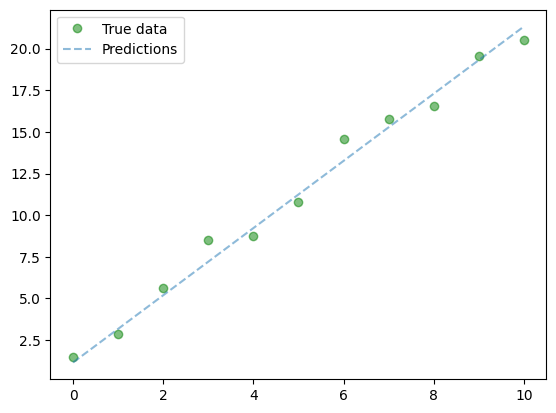

In [57]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Custom Version

In [48]:
class MylinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize, bias=False):
        super(MylinearRegression, self).__init__()
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.bias = bias
        self.weight = torch.nn.Parameter(torch.randn(inputSize, outputSize))
        if bias:
            self.bias = torch.nn.Parameter(torch.randn(outputSize))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        self.weight.reset_parameters()
        if self.bias is not None:
            self.bias.reset_parameters()

    def forward(self, x):
        x = x @ self.weight.t() + self.bias
        return x

In [ ]:
def MyMSELoss(yhat, y):
    return torch.mean((yhat-y)**2)